In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns

%matplotlib inline

### Data Load

In [2]:
train = pd.read_csv("train.csv")

print(train.shape)
train.head()

(10024, 13)


,category,comments,crawl_date,dislike,like,play_time,subscribers,tag,title,top_comment,upload_date,url,views
0,게임,"댓글 4,919개",2018.08.23,277,1.3만,0:14,151만,"['마인크래프트', 'Minecraft', '샌드박스 네트워크', '샌드박스', '...",마크판 거지키우기 업그레이드 *크리에이터* 키우기! - 마인크래프트 - [잠뜰],그동안 여러분이 잠뜰TV에서 가장 재밌게 본 영상은?!\n댓글에 많이 남겨주시고 좋...,게시일: 2018. 8. 17.,https://www.youtube.com/watch?v=azoDJNPRU7s&li...,"조회수 579,949회"
1,게임,"댓글 4,964개",2018.08.23,278,8.7천,0:15,236만,"['도티', '도티 마피아', '도티 머더', '마피아 머더', 'mafia', '...","직업 머더 ""곤충""능력 특집 (부제: 파브르와 저승벌레 팡수)",다음 컨셉은 아이스 크림 어떨까요?예를 들면스크류바:술래가 한 대 치면 술래를 5초...,게시일: 2018. 8. 20.,https://www.youtube.com/watch?v=-BnUuHgUK5Q&li...,"조회수 451,676회"
2,게임,"댓글 5,262개",2018.08.23,561,2.3만,6:47,246만,"['보겸', '보겸TV', 'bokyem', '도티', '롤', '오버워치', '원...",14번의”아디오스” ㄷ1지고싶으면 들이대봐 드루와,모듀 ㅂㅇㄹ ^_^* \nㅋㅋㅋ 역대 최대킬 ㅋㅋㅋ\n고마워 ^_^+ 가조쿠들 ㅋㅋ...,게시일: 2018. 8. 18.,https://www.youtube.com/watch?v=v0rDCGLcnpU&li...,"조회수 955,578회"
3,게임,"댓글 1,823개",2018.08.23,404,1.1천,13:00,23만,"['게임', '위닝', '위닝일레븐', '축구게임', '말이야와 게임들 축구게임',...",그때 눈물의 축구 게임 복수전! 과연 미니 고수 말이야 이길 수 있을까? (꿀잼) ...,"사랑하는 말랑이 여러분! 다음에는 말이야, 로기, 미니 축구팀을 댓글로 남겨주세요....",게시일: 2018. 8. 18.,https://www.youtube.com/watch?v=cK8Z2fz0iUI&li...,"조회수 191,211회"
4,게임,"댓글 1,159개",2018.08.23,36,3.4천,10:00,47만,"['카베', '모바일베그', '배그M', '카카오베그', '연다', '배틀그라운드'...",초보자도 여포로 만들어 줄 수 있는 총 조합! 제가 알려드리죠 ㅋㅋ (배틀그라운드-...,크흠...저런 총이 있어도 난 여포가 아니라 쥐포가 될것 같은데...\niny070...,게시일: 2018. 8. 21.,https://www.youtube.com/watch?v=bBbHq5sMqP0&li...,"조회수 162,253회"


### Upload_date
- 게시년, 월, 일

In [3]:
ls=list(train["upload_date"])

In [4]:
del_list = []
for i, s in enumerate(ls):
    if "시간시간" in s:
        print(s)
        del_list.append(i)
del_list

실시간 스트림: 14시간시간 전
실시간 스트림: 10시간시간 전
실시간 스트림: 12시간시간 전
실시간 스트림: 21시간시간 전
실시간 스트림: 18시간시간 전
실시간 스트림: 21시간시간 전
실시간 스트림: 17시간시간 전
실시간 스트림: 15시간시간 전
실시간 스트림: 18시간시간 전
실시간 스트림: 3시간시간 전
실시간 스트림: 22시간시간 전
실시간 스트림: 23시간시간 전
실시간 스트림: 14시간시간 전
실시간 스트림: 11시간시간 전
실시간 스트림: 10시간시간 전
실시간 스트림: 10시간시간 전
실시간 스트림: 22시간시간 전
실시간 스트림: 11시간시간 전
실시간 스트림: 23시간시간 전
실시간 스트림: 9시간시간 전
실시간 스트림: 21시간시간 전
실시간 스트림: 21시간시간 전
실시간 스트림: 22시간시간 전


[3197,
 3251,
 3263,
 4879,
 4885,
 4906,
 4923,
 4928,
 5279,
 6647,
 7368,
 7390,
 7402,
 7411,
 8134,
 8135,
 8393,
 8425,
 8531,
 8536,
 8557,
 8559,
 8653]

In [5]:
train = train.drop(del_list)
train.shape

(10001, 13)

In [6]:
train = train.reset_index(drop=True)

In [7]:
s = '게시일: 2014. 2. 26.'

In [8]:
s[5:-1].replace(" ","").split(".")

['2014', '2', '26']

In [9]:
def upload_date_clear_year(date):
    if len(date) > 20:
        return int(date[14:-1].replace(" ","").split(".")[0])
    else:
        return int(date[5:-1].replace(" ","").split(".")[0])

def upload_date_clear_month(date):
    if len(date) > 20:
        return int(date[14:-1].replace(" ","").split(".")[1])
    else:
        return int(date[5:-1].replace(" ","").split(".")[1])

def upload_date_clear_day(date):
    if len(date) > 20:
        return int(date[14:-1].replace(" ","").split(".")[2])
    else:
        return int(date[5:-1].replace(" ","").split(".")[2])

In [10]:
train["upload_date_year"] = train["upload_date"].apply(upload_date_clear_year)
train["upload_date_month"] = train["upload_date"].apply(upload_date_clear_month)
train["upload_date_day"] = train["upload_date"].apply(upload_date_clear_day)

In [11]:
train[["upload_date_year", "upload_date_month", "upload_date_day"]].head()

,upload_date_year,upload_date_month,upload_date_day
0,2018,8,17
1,2018,8,20
2,2018,8,18
3,2018,8,18
4,2018,8,21


### Crawl_date

In [12]:
s = '2014.2.26'

In [13]:
int(s.split(".")[0])

2014

In [14]:
def crawl_data_clear_year(date):
    return int(date.split(".")[0])

def crawl_data_clear_month(date):
    return int(date.split(".")[1])

def crawl_data_clear_day(date):
    return int(date.split(".")[2])

In [15]:
train["crawl_date_year"] = train["crawl_date"].apply(crawl_data_clear_year)
train["crawl_date_month"] = train["crawl_date"].apply(crawl_data_clear_month)
train["crawl_date_day"] = train["crawl_date"].apply(crawl_data_clear_day)

In [16]:
train[["crawl_date_year", "crawl_date_month", "crawl_date_day"]].head()

,crawl_date_year,crawl_date_month,crawl_date_day
0,2018,8,23
1,2018,8,23
2,2018,8,23
3,2018,8,23
4,2018,8,23


### Uploaded days

In [17]:
from datetime import date

for idx in tqdm(range(0, len(train))):
    d0 = date(train["upload_date_year"].loc[idx], train["upload_date_month"].loc[idx], train["upload_date_day"].loc[idx])
    d1 = date(train["crawl_date_year"].loc[idx], train["crawl_date_month"].loc[idx], train["crawl_date_day"].loc[idx])
    train.loc[idx, "uploaded_days"] = (d1 - d0).days + 1

100%|██████████| 10001/10001 [00:07<00:00, 1326.96it/s]


In [18]:
train[["uploaded_days"]].head()

,uploaded_days
0,7.0
1,4.0
2,6.0
3,6.0
4,3.0


### Views
- 조회수 ( 일평균 조회수를 target 값으로 사용 )
- 예측할 target

In [19]:
def views_clear(view):
    if view == '조회수 없음':
        return 0
    else:
        return int(view[4:-1].replace(",",""))

In [20]:
train["views"] = train["views"].apply(views_clear)

In [21]:
train["views"].head()

0    579949
1    451676
2    955578
3    191211
4    162253
Name: views, dtype: int64

In [22]:
train["views"] = train["views"] / train["uploaded_days"]

In [23]:
train["views"].head()

0     82849.857143
1    112919.000000
2    159263.000000
3     31868.500000
4     54084.333333
Name: views, dtype: float64

### Dislike
- '싫어요'라는 텍스트만 있는 경우 값은 url확인 결과 '0'인 경우이다.

In [24]:
train[train["dislike"]=='싫어요'].head(1)

,category,comments,crawl_date,dislike,like,play_time,subscribers,tag,title,top_comment,upload_date,url,views,upload_date_year,upload_date_month,upload_date_day,crawl_date_year,crawl_date_month,crawl_date_day,uploaded_days
49,엔터테인먼트,0,2018.08.23,싫어요,좋아요,6:06,0,[],사람들 멘붕 시키려고 돌진했다가 캐리해버린 영상ㅋㅋㅋㅋㅋ | 좀비고 | 좀비고등학교...,NaN,게시일: 2018. 8. 15.,https://www.youtube.com/watch?v=35yrf7vZmIk&in...,13997.222222,2018,8,15,2018,8,23,9.0


In [25]:
train.loc[train["dislike"]=='싫어요', 'dislike'] = '0'

In [26]:
train[train["dislike"]=='싫어요'].head(1)

,category,comments,crawl_date,dislike,like,play_time,subscribers,tag,title,top_comment,upload_date,url,views,upload_date_year,upload_date_month,upload_date_day,crawl_date_year,crawl_date_month,crawl_date_day,uploaded_days


In [27]:
def hand_clear(s):
    '''
    천, 만으로 표시된 값 숫자로 변경
    '''
    if s[-1] == '천':
        return float(s[:-1]) * 1000
    elif s[-1] == '만':
        return float(s[:-1]) * 10000
    else:
        return float(s)

In [28]:
train["dislike"] = train["dislike"].apply(hand_clear)

### Like
- '좋아요'라는 텍스트만 있는 경우 값은 url확인 결과 '0'인 경우이다.

In [29]:
train[train["like"]=='좋아요'].head(1)

,category,comments,crawl_date,dislike,like,play_time,subscribers,tag,title,top_comment,upload_date,url,views,upload_date_year,upload_date_month,upload_date_day,crawl_date_year,crawl_date_month,crawl_date_day,uploaded_days
49,엔터테인먼트,0,2018.08.23,0.0,좋아요,6:06,0,[],사람들 멘붕 시키려고 돌진했다가 캐리해버린 영상ㅋㅋㅋㅋㅋ | 좀비고 | 좀비고등학교...,NaN,게시일: 2018. 8. 15.,https://www.youtube.com/watch?v=35yrf7vZmIk&in...,13997.222222,2018,8,15,2018,8,23,9.0


In [30]:
train.loc[train["like"]=='좋아요', 'like'] = '0'

In [31]:
train[train["like"]=='좋아요'].head(1)

,category,comments,crawl_date,dislike,like,play_time,subscribers,tag,title,top_comment,upload_date,url,views,upload_date_year,upload_date_month,upload_date_day,crawl_date_year,crawl_date_month,crawl_date_day,uploaded_days


In [32]:
train["like"] = train["like"].apply(hand_clear)

In [33]:
train[["dislike", "like"]].head()

,dislike,like
0,277.0,13000.0
1,278.0,8700.0
2,561.0,23000.0
3,404.0,1100.0
4,36.0,3400.0


### Comments
- 댓글 갯수

In [34]:
def comments_clear(comment):
    if comment[-1] == "개":
        return int(comment[3:-1].replace(",",""))
    else:
        return int(comment)

In [35]:
train["comments"] = train["comments"].apply(comments_clear)

In [36]:
train["comments"].head()

0    4919
1    4964
2    5262
3    1823
4    1159
Name: comments, dtype: int64

### Subscribers
- 구독자 수

In [37]:
def subscriber_clear(s):
    '''
    천, 만으로 표시된 값 숫자로 변경
    '''
    if s[-1] == '천':
        return float(s[:-1]) * 1000
    elif s[-1] == '만':
        return float(s[:-1]) * 10000
    else:
        return float(s)

In [38]:
train["subscribers"] = train["subscribers"].apply(subscriber_clear)

In [39]:
train["subscribers"].head()

0    1510000.0
1    2360000.0
2    2460000.0
3     230000.0
4     470000.0
Name: subscribers, dtype: float64

### Play time

In [40]:
def convert_time(t):
    if type(t) is float:
        return t
    else:
        return int(t.split(":")[0]) * 60 + int(t.split(":")[1])

In [41]:
train["play_time"] = train["play_time"].apply(convert_time)

In [42]:
train.loc[train["play_time"].isna(), "play_time"] = np.mean(train["play_time"])

In [43]:
train["play_time"].head()

0     14.0
1     15.0
2    407.0
3    780.0
4    600.0
Name: play_time, dtype: float64

### Length of title

In [44]:
def title_length(s):
    return len(s)

In [45]:
train["title_length"] = train["title"].apply(title_length)

In [46]:
train["title_length"].head()

0    44
1    34
2    27
3    96
4    56
Name: title_length, dtype: int64

### Number of Tag

In [47]:
import ast

def tag_list(x):
    return ast.literal_eval(x)

def tag_count(x):
    return len(x)

In [48]:
train["tag_list"] = train["tag"].apply(tag_list)

In [49]:
train["tag_count"] = train["tag"].apply(tag_count)

In [50]:
train[["tag_list", "tag_count"]].head()

,tag_list,tag_count
0,"[마인크래프트, Minecraft, 샌드박스 네트워크, 샌드박스, 샌박, Sandb...",512
1,"[도티, 도티 마피아, 도티 머더, 마피아 머더, mafia, 마인크래프트 머더, ...",293
2,"[보겸, 보겸TV, bokyem, 도티, 롤, 오버워치, 원피스, 리그오브레전드, ...",167
3,"[게임, 위닝, 위닝일레븐, 축구게임, 말이야와 게임들 축구게임, 말이야와 게임들 ...",533
4,"[카베, 모바일베그, 배그M, 카카오베그, 연다, 배틀그라운드, PSS, APL, ...",461


###  Similarity of Title and Tag

In [51]:
### 태그 단어안 공백 제거
def blank_delete(ls):
    for i in range(0, len(ls)):
        ls[i] = ls[i].replace(" ","")
    return ls

train["tag_list"] = train["tag_list"].apply(blank_delete)

In [52]:
train[["title", "tag", "tag_list"]].head()

,title,tag,tag_list
0,마크판 거지키우기 업그레이드 *크리에이터* 키우기! - 마인크래프트 - [잠뜰],"['마인크래프트', 'Minecraft', '샌드박스 네트워크', '샌드박스', '...","[마인크래프트, Minecraft, 샌드박스네트워크, 샌드박스, 샌박, Sandbo..."
1,"직업 머더 ""곤충""능력 특집 (부제: 파브르와 저승벌레 팡수)","['도티', '도티 마피아', '도티 머더', '마피아 머더', 'mafia', '...","[도티, 도티마피아, 도티머더, 마피아머더, mafia, 마인크래프트머더, 도티마인..."
2,14번의”아디오스” ㄷ1지고싶으면 들이대봐 드루와,"['보겸', '보겸TV', 'bokyem', '도티', '롤', '오버워치', '원...","[보겸, 보겸TV, bokyem, 도티, 롤, 오버워치, 원피스, 리그오브레전드, ..."
3,그때 눈물의 축구 게임 복수전! 과연 미니 고수 말이야 이길 수 있을까? (꿀잼) ...,"['게임', '위닝', '위닝일레븐', '축구게임', '말이야와 게임들 축구게임',...","[게임, 위닝, 위닝일레븐, 축구게임, 말이야와게임들축구게임, 말이야와게임들축구, ..."
4,초보자도 여포로 만들어 줄 수 있는 총 조합! 제가 알려드리죠 ㅋㅋ (배틀그라운드-...,"['카베', '모바일베그', '배그M', '카카오베그', '연다', '배틀그라운드'...","[카베, 모바일베그, 배그M, 카카오베그, 연다, 배틀그라운드, PSS, APL, ..."


In [53]:
from sklearn.feature_extraction.text import CountVectorizer

### Count same word between title and tag list

In [54]:
train["same_count"] = np.nan
for idx in tqdm(range(0, len(train))):
    try:
        if train.loc[idx, "tag_list"] == []:
            train.loc[idx, "same_count"] = 0
        else:
            vect = CountVectorizer(analyzer='word',token_pattern=r"(?u)\b\w+\b")
            vect.fit(train["tag_list"].loc[idx])
            train.loc[idx, "same_count"]= vect.transform([train["title"].loc[idx]]).toarray().sum()
    except:
        vect2 = CountVectorizer(analyzer='char')

100%|██████████| 10001/10001 [00:13<00:00, 743.09it/s]


In [55]:
train["same_count"].value_counts()

0.0     3014
1.0     2481
2.0     1769
3.0     1187
4.0      704
5.0      396
6.0      201
7.0      110
8.0       55
9.0       30
10.0      20
11.0      15
12.0       9
14.0       7
13.0       2
18.0       1
Name: same_count, dtype: int64

### Cosine Similarity of word between tag and title

In [56]:
vect2 = CountVectorizer(analyzer='word', token_pattern=r"(?u)\b\w+\b")

In [57]:
vect2.fit(train["tag"])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w+\\b', tokenizer=None,
        vocabulary=None)

In [58]:
pd.DataFrame(vect2.vocabulary_, index = ["word_count"]).T.head()

,word_count
마인크래프트,25894
minecraft,9392
샌드박스,31248
네트워크,21840
샌박,31259


In [59]:
from sklearn.metrics.pairwise import cosine_similarity

In [60]:
for idx in tqdm(range(0, len(train))):
    tag_vect = vect2.transform([train["tag"].loc[idx]]).toarray()
    title_vect = vect2.transform([train["title"].loc[idx]]).toarray()
    similarity = cosine_similarity(tag_vect, title_vect)
    train.loc[idx, "title_cosine_similarity"] = similarity[0]

100%|██████████| 10001/10001 [00:16<00:00, 607.84it/s]


In [61]:
train[["title","tag","same_count", "title_cosine_similarity"]].head()

,title,tag,same_count,title_cosine_similarity
0,마크판 거지키우기 업그레이드 *크리에이터* 키우기! - 마인크래프트 - [잠뜰],"['마인크래프트', 'Minecraft', '샌드박스 네트워크', '샌드박스', '...",4.0,0.447214
1,"직업 머더 ""곤충""능력 특집 (부제: 파브르와 저승벌레 팡수)","['도티', '도티 마피아', '도티 머더', '마피아 머더', 'mafia', '...",0.0,0.129437
2,14번의”아디오스” ㄷ1지고싶으면 들이대봐 드루와,"['보겸', '보겸TV', 'bokyem', '도티', '롤', '오버워치', '원...",0.0,0.000000
3,그때 눈물의 축구 게임 복수전! 과연 미니 고수 말이야 이길 수 있을까? (꿀잼) ...,"['게임', '위닝', '위닝일레븐', '축구게임', '말이야와 게임들 축구게임',...",8.0,0.441615
4,초보자도 여포로 만들어 줄 수 있는 총 조합! 제가 알려드리죠 ㅋㅋ (배틀그라운드-...,"['카베', '모바일베그', '배그M', '카카오베그', '연다', '배틀그라운드'...",3.0,0.121466


### Cosine Similarity of word between tag and top comments

In [62]:
train.loc[train['top_comment'].isna(), "top_comment"] = ''

In [63]:
for idx in tqdm(range(0, len(train))):
    tag_vect = vect2.transform([train["tag"].loc[idx]]).toarray()
    comment_vect = vect2.transform([train["top_comment"].loc[idx]]).toarray()
    similarity = cosine_similarity(tag_vect, comment_vect)
    train.loc[idx, "comment_cosine_similarity"] = similarity[0]

100%|██████████| 10001/10001 [00:17<00:00, 576.83it/s]


In [64]:
train[["top_comment", "tag", "comment_cosine_similarity"]].head()

,top_comment,tag,comment_cosine_similarity
0,그동안 여러분이 잠뜰TV에서 가장 재밌게 본 영상은?!\n댓글에 많이 남겨주시고 좋...,"['마인크래프트', 'Minecraft', '샌드박스 네트워크', '샌드박스', '...",0.000000
1,다음 컨셉은 아이스 크림 어떨까요?예를 들면스크류바:술래가 한 대 치면 술래를 5초...,"['도티', '도티 마피아', '도티 머더', '마피아 머더', 'mafia', '...",0.000000
2,모듀 ㅂㅇㄹ ^_^* \nㅋㅋㅋ 역대 최대킬 ㅋㅋㅋ\n고마워 ^_^+ 가조쿠들 ㅋㅋ...,"['보겸', '보겸TV', 'bokyem', '도티', '롤', '오버워치', '원...",0.000000
3,"사랑하는 말랑이 여러분! 다음에는 말이야, 로기, 미니 축구팀을 댓글로 남겨주세요....","['게임', '위닝', '위닝일레븐', '축구게임', '말이야와 게임들 축구게임',...",0.061199
4,크흠...저런 총이 있어도 난 여포가 아니라 쥐포가 될것 같은데...\niny070...,"['카베', '모바일베그', '배그M', '카카오베그', '연다', '배틀그라운드'...",0.000000


### Category

In [65]:
train["category"].value_counts()

음악          1907
엔터테인먼트      1793
인물/블로그      1576
뉴스/정치       1204
스포츠          836
영화/애니메이션     721
노하우/스타일      602
게임           424
코미디          288
동물           182
교육           142
프로그램          93
여행/이벤트        77
과학기술          61
비영리/사회운동      54
자동차           41
Name: category, dtype: int64

In [66]:
category_df = pd.pivot_table(train, index='title', columns='category', values='views', aggfunc='count').reset_index(drop=False)

In [67]:
category_df = category_df.fillna(0)
category_df.columns = ['title', 'game', 'science', 'education', 'style', 'news', 'animal', 'social', 'sports',
                       'entertainment', 'journey', 'movie', 'music', 'people', 'automobile', 'comic', 'program']

In [68]:
category_df.head()

,title,game,science,education,style,news,animal,social,sports,entertainment,journey,movie,music,people,automobile,comic,program
0,"""'쾅' 하늘로 기왓장 솟아올라""…양주 주택가 가스폭발 현장",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"""10대 무면허 운전에..."" 중고생 4명 숨지고 1명 중상 / YTN",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"""12골 대폭발! 금메달 쾌속질주!"" 한국 여자축구 인도네시아 대파 '조 1위' 8...",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"""Clever Cats Opening Doors Compilation"" || CFS",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"""Clumsy Cats Compilation"" || CFS",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
train = train.set_index('title').join(category_df.set_index('title')).reset_index(drop=False)

print(train.shape)
train.head()

(10001, 42)


,title,category,comments,crawl_date,dislike,like,play_time,subscribers,tag,top_comment,...,social,sports,entertainment,journey,movie,music,people,automobile,comic,program
0,마크판 거지키우기 업그레이드 *크리에이터* 키우기! - 마인크래프트 - [잠뜰],게임,4919,2018.08.23,277.0,13000.0,14.0,1510000.0,"['마인크래프트', 'Minecraft', '샌드박스 네트워크', '샌드박스', '...",그동안 여러분이 잠뜰TV에서 가장 재밌게 본 영상은?!\n댓글에 많이 남겨주시고 좋...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"직업 머더 ""곤충""능력 특집 (부제: 파브르와 저승벌레 팡수)",게임,4964,2018.08.23,278.0,8700.0,15.0,2360000.0,"['도티', '도티 마피아', '도티 머더', '마피아 머더', 'mafia', '...",다음 컨셉은 아이스 크림 어떨까요?예를 들면스크류바:술래가 한 대 치면 술래를 5초...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14번의”아디오스” ㄷ1지고싶으면 들이대봐 드루와,게임,5262,2018.08.23,561.0,23000.0,407.0,2460000.0,"['보겸', '보겸TV', 'bokyem', '도티', '롤', '오버워치', '원...",모듀 ㅂㅇㄹ ^_^* \nㅋㅋㅋ 역대 최대킬 ㅋㅋㅋ\n고마워 ^_^+ 가조쿠들 ㅋㅋ...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,그때 눈물의 축구 게임 복수전! 과연 미니 고수 말이야 이길 수 있을까? (꿀잼) ...,게임,1823,2018.08.23,404.0,1100.0,780.0,230000.0,"['게임', '위닝', '위닝일레븐', '축구게임', '말이야와 게임들 축구게임',...","사랑하는 말랑이 여러분! 다음에는 말이야, 로기, 미니 축구팀을 댓글로 남겨주세요....",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,초보자도 여포로 만들어 줄 수 있는 총 조합! 제가 알려드리죠 ㅋㅋ (배틀그라운드-...,게임,1159,2018.08.23,36.0,3400.0,600.0,470000.0,"['카베', '모바일베그', '배그M', '카카오베그', '연다', '배틀그라운드'...",크흠...저런 총이 있어도 난 여포가 아니라 쥐포가 될것 같은데...\niny070...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Feature Selection

In [70]:
feature_names = ['comments', 'dislike', 'like',
       'play_time', 'subscribers',
       'upload_date_year', 'upload_date_month', 'upload_date_day',
       'crawl_date_year', 'crawl_date_month', 'crawl_date_day',
       'uploaded_days', 'title_length', 'tag_count', 'same_count',
       'title_cosine_similarity', 'game', 'science', 'education', 'style',
       'news', 'animal', 'social', 'sports', 'entertainment', 'journey',
       'movie', 'music', 'people', 'automobile', 'comic', 'program', 'comment_cosine_similarity']

In [71]:
X_train = train[feature_names]

print(X_train.shape)

(10001, 33)


In [72]:
y_train = train['views']

y_train[:5]

0     82849.857143
1    112919.000000
2    159263.000000
3     31868.500000
4     54084.333333
Name: views, dtype: float64

### Model

In [73]:
import lightgbm as lgbm

model = lgbm.LGBMRegressor(max_depth=9, n_estimators=300)

model

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.1, max_depth=9, min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=300,
       n_jobs=-1, num_leaves=31, objective=None, random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=8)

In [75]:
%time model.fit(X_train, y_train)

CPU times: user 1.21 s, sys: 1.42 s, total: 2.63 s
Wall time: 1.11 s


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.1, max_depth=9, min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=300,
       n_jobs=-1, num_leaves=31, objective=None, random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

In [76]:
prediction = model.predict(X_test)

print(prediction.shape)
prediction

(3301,)


array([   271.78036973,  40547.40228866,  54047.37816665, ...,
         5942.64049888,   3406.42789785,   7795.86463133])

In [77]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from math import sqrt

rmse_result = sqrt(mean_squared_error(y_test, prediction))
mae_result = mean_absolute_error(y_test, prediction)

In [78]:
rmse_result

154558.93167192797

In [79]:
mae_result

29839.507490551579

<BarContainer object of 3301 artists>

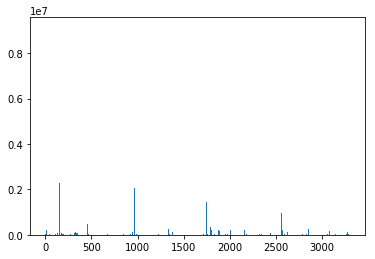

In [80]:
plt.bar(np.arange(0,len(y_test)), y_test)

<BarContainer object of 3301 artists>

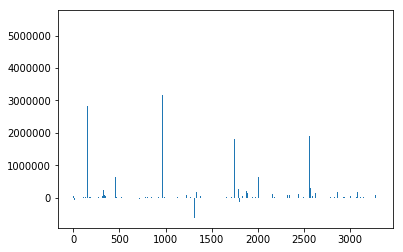

In [81]:
plt.bar(np.arange(0,len(prediction)), prediction)

### importance
- 예측을 해야 한다면 좋아요, 싫어요, 댓글수, 총 업로드된 일수, 구독자 수 정도가 중요해 보인다.

In [82]:
importance = pd.DataFrame(model.feature_importances_, index=X_train.columns)

In [83]:
importance.columns = ["feature_importance"]

In [84]:
importance = importance.sort_values(by='feature_importance', ascending=False)

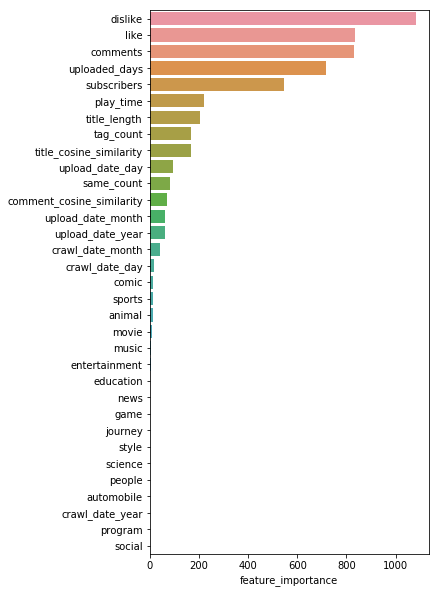

In [85]:
fig, ax = plt.subplots(figsize=(5, 10))
sns.barplot(x=importance["feature_importance"], y=importance.index, ax=ax)

### 다중 공선성 제거

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,2.574229e+00,comments
1,3.512606e+00,dislike
2,3.779505e+00,like
3,1.174507e+00,play_time
4,1.783131e+00,subscribers
5,1.515838e+06,upload_date_year
6,2.039118e+04,upload_date_month
7,1.919110e+02,upload_date_day
8,0.000000e+00,crawl_date_year
9,3.188287e+02,crawl_date_month


In [87]:
feature_names.append('views')
X_train = train[feature_names]

### 선형관계 보기

In [89]:
import statsmodels.api as sm

scale_model = sm.OLS.from_formula("views ~ "
                            "scale(like) + scale(dislike) + scale(comments) + scale(play_time) + scale(subscribers) +"
                            'scale(title_length) + scale(title_cosine_similarity) + scale(comment_cosine_similarity)', data=X_train)
result = scale_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     1055.
Date:                Fri, 14 Sep 2018   Prob (F-statistic):               0.00
Time:                        23:49:05   Log-Likelihood:            -1.3808e+05
No. Observations:               10001   AIC:                         2.762e+05
Df Residuals:                    9992   BIC:                         2.762e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

#### p_value 0.05이상 제거

In [92]:
scale_model = sm.OLS.from_formula("views ~ "
                            "scale(like) + scale(dislike) +"
                            'scale(title_length) + scale(comment_cosine_similarity)', data=X_train)
result = scale_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     2108.
Date:                Fri, 14 Sep 2018   Prob (F-statistic):               0.00
Time:                        23:52:09   Log-Likelihood:            -1.3808e+05
No. Observations:               10001   AIC:                         2.762e+05
Df Residuals:                    9996   BIC:                         2.762e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep